In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
image_dir = Path("C:/Users/NET_PC/Desktop/Adrenocortical carcionoma project/JPG 2 Data")

In [3]:
filepaths = list(image_dir.glob(r'**/*.JPG'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

image_df = pd.concat([filepaths, labels], axis=1)

In [4]:
image_df

,Filepath,Label
0,C:\Users\NET_PC\Desktop\Adrenocortical carcion...,Adrenocortical carcinoma JPG (Type 2)
1,C:\Users\NET_PC\Desktop\Adrenocortical carcion...,Adrenocortical carcinoma JPG (Type 2)
2,C:\Users\NET_PC\Desktop\Adrenocortical carcion...,Adrenocortical carcinoma JPG (Type 2)
3,C:\Users\NET_PC\Desktop\Adrenocortical carcion...,Adrenocortical carcinoma JPG (Type 2)
4,C:\Users\NET_PC\Desktop\Adrenocortical carcion...,Adrenocortical carcinoma JPG (Type 2)
...,...,...
36425,C:\Users\NET_PC\Desktop\Adrenocortical carcion...,Kidney tumor JPG (Type 2)
36426,C:\Users\NET_PC\Desktop\Adrenocortical carcion...,Kidney tumor JPG (Type 2)
36427,C:\Users\NET_PC\Desktop\Adrenocortical carcion...,Kidney tumor JPG (Type 2)
36428,C:\Users\NET_PC\Desktop\Adrenocortical carcion...,Kidney tumor JPG (Type 2)


In [5]:
train_df, test_df = train_test_split(image_df, train_size=0.80, shuffle=True, random_state=1)

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                  horizontal_flip=True,
                                                                  width_shift_range=0.2,
                                                                  height_shift_range=0.2,
                                                                  validation_split=0.2)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [7]:
train_images = train_generator.flow_from_dataframe(dataframe=train_df,
                                                   x_col='Filepath',
                                                   y_col='Label',
                                                   target_size=(64, 64),
                                                   color_mode='rgb',
                                                   class_mode='binary',
                                                   batch_size=32,
                                                   shuffle=True,
                                                   seed=42,
                                                   subset='training')

val_images = train_generator.flow_from_dataframe(dataframe=train_df,
                                                 x_col='Filepath',
                                                 y_col='Label',
                                                 target_size=(64, 64),
                                                 color_mode='rgb',
                                                 class_mode='binary',
                                                 batch_size=32,
                                                 shuffle=True,
                                                 seed=42,
                                                 subset='validation')

test_images = test_generator.flow_from_dataframe(dataframe=test_df,
                                                 x_col='Filepath',
                                                 y_col='Label',
                                                 target_size=(64, 64),
                                                 color_mode='rgb',
                                                 class_mode='binary',
                                                 batch_size=32,
                                                 shuffle=False)

Found 23316 validated image filenames belonging to 2 classes.
Found 5828 validated image filenames belonging to 2 classes.
Found 7286 validated image filenames belonging to 2 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

def create_model(input_shape, num_classes):
    model = Sequential()

    # Mixed-Scale Dense Convolution Layer
    model.add(Conv2D(input_shape=(64,64,3), filters=16, kernel_size=(3, 3), activation="relu"))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Self-Attention Mechanism
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Hierarchical Feature Fusion
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Attention-Based Contextual Information
    model.add(Flatten())
    model.add(Dense(units=64, activation="relu"))
    model.add(Dropout(0.25))
    
    # Additional Fully Connected Layers
    model.add(Dense(units=128, activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(units=64, activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(units=32, activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(units=16, activation="relu"))
    model.add(Dropout(0.25))

    # Output layer
    model.add(Dense(units=1, activation="sigmoid"))

    return model

In [9]:
# Create the model
model = create_model((64,64,3), 1)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 128)       7

In [11]:
# Compile the model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [12]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            patience=3
        )
    ]
)

Epoch 1/50
729/729 [==============================] - 374s 512ms/step - loss: 0.6919 - accuracy: 0.5157 - val_loss: 0.6797 - val_accuracy: 0.5944 - lr: 1.0000e-04
Epoch 2/50
729/729 [==============================] - 689s 945ms/step - loss: 0.6715 - accuracy: 0.5971 - val_loss: 0.6400 - val_accuracy: 0.6568 - lr: 1.0000e-04
Epoch 3/50
729/729 [==============================] - 713s 979ms/step - loss: 0.6432 - accuracy: 0.6398 - val_loss: 0.5928 - val_accuracy: 0.6941 - lr: 1.0000e-04
Epoch 4/50
729/729 [==============================] - 692s 949ms/step - loss: 0.6046 - accuracy: 0.6826 - val_loss: 0.5614 - val_accuracy: 0.7083 - lr: 1.0000e-04
Epoch 5/50
729/729 [==============================] - 490s 672ms/step - loss: 0.5660 - accuracy: 0.7189 - val_loss: 0.5261 - val_accuracy: 0.7394 - lr: 1.0000e-04
Epoch 6/50
729/729 [==============================] - 499s 685ms/step - loss: 0.5412 - accuracy: 0.7369 - val_loss: 0.4991 - val_accuracy: 0.7577 - lr: 1.0000e-04
Epoch 7/50
729/729 [==

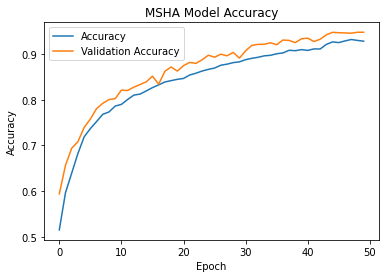

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('MSHA Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Validation Accuracy', 'loss', 'Validation Loss'])
plt.show()

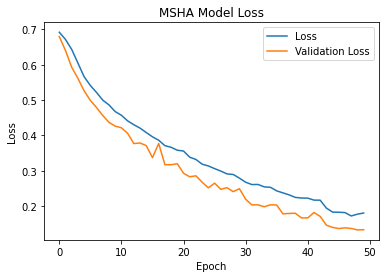

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MSHA Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [15]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.10799
Test Accuracy: 95.65%


228/228 [==============================] - 10s 42ms/step


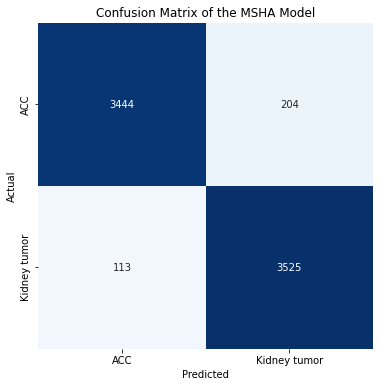

Classification Report:
----------------------
               precision    recall  f1-score   support

         ACC       0.97      0.94      0.96      3648
Kidney tumor       0.95      0.97      0.96      3638

    accuracy                           0.96      7286
   macro avg       0.96      0.96      0.96      7286
weighted avg       0.96      0.96      0.96      7286



In [16]:
predictions = (model.predict(test_images) >= 0.5).astype(int)

cm = confusion_matrix(test_images.labels, predictions, labels=[0, 1])
clr = classification_report(test_images.labels, predictions, labels=[0, 1], target_names=["ACC", "Kidney tumor"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["ACC", "Kidney tumor"])
plt.yticks(ticks=[0.5, 1.5], labels=["ACC", "Kidney tumor"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of the MSHA Model")
plt.show()

print("Classification Report:\n----------------------\n", clr)

228/228 [==============================] - 9s 41ms/step
AUC ROC: 0.99324


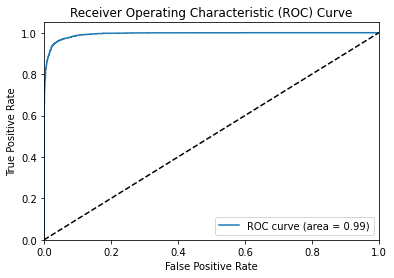

In [17]:
# Obtain predicted probabilities
from sklearn.metrics import roc_auc_score, roc_curve

predicted_probabilities = model.predict(test_images)

# Compute AUC ROC
auc_roc = roc_auc_score(test_images.labels, predicted_probabilities)

print("AUC ROC: {:.5f}".format(auc_roc))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(test_images.labels, predicted_probabilities)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [18]:
# save the model to a file
model.save('MSHA Model-ACC vs Kidney tumor .h5')

In [2]:
from keras.models import load_model

# Load the model
loaded_model = load_model('MSHA Model-ACC vs Kidney tumor .h5')

# Now you can use the loaded_model for predictions

In [6]:
#Create a Flask App
#1. Create a New Directory
import os

# Specify the name of your new directory
new_directory = 'model_deployment'

# Create the directory if it doesn't exist
if not os.path.exists(new_directory):
    os.makedirs(new_directory)

# Move into the new directory
os.chdir(new_directory)